In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
with open("C://Data//hislight_pickles//restricted_dark.pickle", 'rb') as handle:
    restricted_dark = pickle.load(handle)
    
with open('C://Data//hislight_pickles//adlib_light.pickle', 'rb') as handle:
    adlib_light = pickle.load(handle)
    
with open('C://Data//hislight_pickles//adlib_dark.pickle', 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open('C://Data//hislight_pickles//adlib_sucralose.pickle', 'rb') as handle:
    adlib_sucralose = pickle.load(handle)    
    

In [3]:
list_of_mice = []

for key, val in restricted_dark.items():
    if val["mouse_ID"] not in list_of_mice:
        list_of_mice.append(val["mouse_ID"])

In [61]:
def get_snips(data):

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=10
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []
        print(mouse)

        for key, val in data.items():
            
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 50:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
                snipper.find_potential_artifacts(threshold=8, method="sum")
                print(snipper.snips.shape)
                if snipper.snips.shape[0]==0:
                    snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

In [62]:
light_start, light_end, light_full = get_snips(adlib_light)

HL202
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL203
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL204
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
(9, 260)
no snips to concatenate
HL205
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL206
<class 'numpy.ndarray'>
(3, 260)
no snips to concatenate
HL207
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(6, 260)
<class 'numpy.ndarray'>
(5, 260)
no snips to concatenate
HL208
<class 'numpy.ndarray'>
(5, 260)
<class 'numpy.ndarray'>
(2, 260)
<class 'numpy.ndarray'>
(3, 260)
no snips to concatenate
HL209
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(1, 260)
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
Found 1 poten

In [63]:
light_start, light_end, light_full = get_snips(adlib_light)
dark_start, dark_end, dark_full = get_snips(adlib_dark)
restricted_start, restricted_end, restricted_full = get_snips(restricted_dark)
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)

HL202
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL203
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL204
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
(9, 260)
no snips to concatenate
HL205
<class 'numpy.ndarray'>
(3, 260)
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(3, 260)
<class 'numpy.ndarray'>
(4, 260)
no snips to concatenate
HL206
<class 'numpy.ndarray'>
(3, 260)
no snips to concatenate
HL207
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
(6, 260)
<class 'numpy.ndarray'>
(5, 260)
no snips to concatenate
HL208
<class 'numpy.ndarray'>
(5, 260)
<class 'numpy.ndarray'>
(2, 260)
<class 'numpy.ndarray'>
(3, 260)
no snips to concatenate
HL209
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(1, 260)
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
Found 1 poten

<ipython-input-61-3a325df1bb98>:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  snips_mean_full = np.array(snips_mean_full)


In [64]:
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)

HL202
<class 'numpy.ndarray'>
(2, 260)
no snips to concatenate
HL203
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(1, 260)
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(1, 260)
no snips to concatenate
HL204
<class 'numpy.ndarray'>
(1, 260)
<class 'numpy.ndarray'>
(1, 260)
no snips to concatenate
HL205
<class 'numpy.ndarray'>
Found 5 potential artifacts.
(0,)
adding this mouse
HL206
<class 'numpy.ndarray'>
(1, 260)
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(2, 260)
no snips to concatenate
HL207
<class 'numpy.ndarray'>
(4, 260)
<class 'numpy.ndarray'>
Found 1 potential artifacts.
(0,)
adding this mouse
HL208
<class 'numpy.ndarray'>
Found 2 potential artifacts.
(4, 260)
<class 'numpy.ndarray'>
(2, 260)
no snips to concatenate
HL209
<class 'numpy.ndarray'>
(0, 260)
<class 'numpy.ndarray'>
(1, 260)
adding this mouse
HL210
<class 'numpy.ndarray'>
(0, 260)
<class 'numpy.ndarray'>
(0, 260)
adding this mouse
HL211
<class 'numpy.ndarray'>
(0, 260)
<class 'numpy.ndarray

<ipython-input-61-3a325df1bb98>:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  snips_mean_full = np.array(snips_mean_full)


In [41]:
colors_adlib_light = "#D83F31"
colors_adlib_dark = "#EE9322"
colors_restricted = "#219C90"
colors_sucralose = "#E9B824"

colors_adlib_light_2 = "#f7d8d5"
colors_adlib_dark_2 = "#fbe9d2"
colors_restricted_2 = "#d2ebe8"
colors_sucralose_2 = "#faf0d3"

colors = ["#D83F31", "#EE9322", "#219C90","#E9B824"]

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

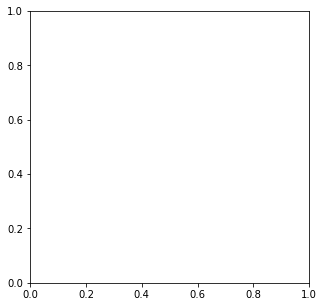

In [69]:
#ALL CONDITIONS ON ONE PLOT
f, ax =plt.subplots(figsize=[5,5])

pre = 5
post = 10
mineventlength=10
binlength=0.1

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

#restricted
x1_restricted = np.arange(0,bins_early)
x2_restricted = np.arange(restricted_full.shape[1] - bins_late, restricted_full.shape[1])

mean_restricted = np.mean(restricted_full, axis=0)
error_values_restricted = np.std(restricted_full, axis=0) / np.sqrt(len(restricted_full))

ax.plot(x1_restricted, mean_restricted[:bins_early], color=colors_restricted)
ax.plot(x2_restricted, mean_restricted[-bins_late:], color=colors_restricted)

ax.fill_between(x1_restricted, mean_restricted[:bins_early]-error_values_restricted[:bins_early], 
                mean_restricted[:bins_early]+error_values_restricted[:bins_early], 
                color=colors_restricted, alpha=0.3)
ax.fill_between(x2_restricted, mean_restricted[-bins_late:]-error_values_restricted[-bins_late:], 
                mean_restricted[-bins_late:]+error_values_restricted[-bins_late:], 
                color=colors_restricted, alpha=0.3)

# adlib light

x1_light = np.arange(0,bins_early)
x2_light = np.arange(light_full.shape[1] - bins_late, light_full.shape[1])

mean_light = np.mean(light_full, axis=0)
error_values_light = np.std(light_full, axis=0) / np.sqrt(len(light_full))

ax.plot(x1_light, mean_light[:bins_early], color=colors_adlib_light)
ax.plot(x2_light, mean_light[-bins_late:], color=colors_adlib_light)

ax.fill_between(x1_light, mean_light[:bins_early]-error_values_light[:bins_early], 
                mean_light[:bins_early]+error_values_light[:bins_early], 
                color=colors_adlib_light, alpha=0.3)
ax.fill_between(x2_light, mean_light[-bins_late:]-error_values_light[-bins_late:], 
                mean_light[-bins_late:]+error_values_light[-bins_late:], 
                color=colors_adlib_light, alpha=0.3)

# adlib dark

x1_dark = np.arange(0,bins_early)
x2_dark = np.arange(dark_full.shape[1] - bins_late, dark_full.shape[1])

mean_dark = np.mean(dark_full, axis=0)
error_values_dark = np.std(dark_full, axis=0) / np.sqrt(len(dark_full))

ax.plot(x1_dark, mean_dark[:bins_early], color=colors_adlib_dark)
ax.plot(x2_dark, mean_dark[-bins_late:], color=colors_adlib_dark)

ax.fill_between(x1_dark, mean_dark[:bins_early]-error_values_dark[:bins_early], 
                mean_dark[:bins_early]+error_values_dark[:bins_early], 
                color=colors_adlib_dark, alpha=0.3)
ax.fill_between(x2_dark, mean_dark[-bins_late:]-error_values_dark[-bins_late:], 
                mean_dark[-bins_late:]+error_values_dark[-bins_late:], 
                color=colors_adlib_dark, alpha=0.3)


# sucralose

x1_sucralose = np.arange(0,bins_early)
x2_sucralose = np.arange(sucralose_full.shape[1] - bins_late, sucralose_full.shape[1])

mean_sucralose = np.nanmean(sucralose_full, axis=0)
error_values_sucralose= np.std(sucralose_full, axis=0) / np.sqrt(len(sucralose_full))

ax.plot(x1_sucralose, mean_sucralose[:bins_early], color=colors_sucralose)
ax.plot(x2_sucralose, mean_sucralose[-bins_late:], color=colors_sucralose)

ax.fill_between(x1_sucralose, mean_sucralose[:bins_early]-error_values_sucralose[:bins_early], 
                mean_sucralose[:bins_early]+error_values_sucralose[:bins_early], 
                color=colors_sucralose, alpha=0.3)
ax.fill_between(x2_sucralose, mean_sucralose[-bins_late:]-error_values_sucralose[-bins_late:], 
                mean_sucralose[-bins_late:]+error_values_sucralose[-bins_late:], 
                color=colors_sucralose, alpha=0.3)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\new_diff_conditions.pdf")

IndexError: tuple index out of range

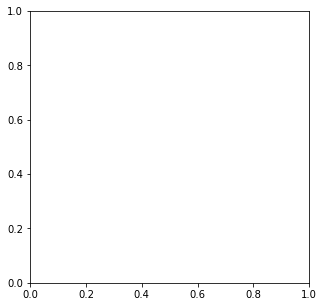

In [66]:
#LIGHT VS DARK
f, ax =plt.subplots(figsize=[5,5])

pre = 5
post = 10
mineventlength=10
binlength=0.1

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

# adlib light

x1_light = np.arange(0,bins_early)
x2_light = np.arange(light_full.shape[1] - bins_late, light_full.shape[1])

mean_light = np.mean(light_full, axis=0)
error_values_light = np.std(light_full, axis=0) / np.sqrt(len(light_full))

ax.plot(x1_light, mean_light[:bins_early], color=colors_adlib_light)
ax.plot(x2_light, mean_light[-bins_late:], color=colors_adlib_light)

ax.fill_between(x1_light, mean_light[:bins_early]-error_values_light[:bins_early], 
                mean_light[:bins_early]+error_values_light[:bins_early], 
                color=colors_adlib_light, alpha=0.3)
ax.fill_between(x2_light, mean_light[-bins_late:]-error_values_light[-bins_late:], 
                mean_light[-bins_late:]+error_values_light[-bins_late:], 
                color=colors_adlib_light, alpha=0.3)

# adlib dark

x1_dark = np.arange(0,bins_early)
x2_dark = np.arange(dark_full.shape[1] - bins_late, dark_full.shape[1])

mean_dark = np.mean(dark_full, axis=0)
error_values_dark = np.std(dark_full, axis=0) / np.sqrt(len(dark_full))

ax.plot(x1_dark, mean_dark[:bins_early], color=colors_adlib_dark)
ax.plot(x2_dark, mean_dark[-bins_late:], color=colors_adlib_dark)

ax.fill_between(x1_dark, mean_dark[:bins_early]-error_values_dark[:bins_early], 
                mean_dark[:bins_early]+error_values_dark[:bins_early], 
                color=colors_adlib_dark, alpha=0.3)
ax.fill_between(x2_dark, mean_dark[-bins_late:]-error_values_dark[-bins_late:], 
                mean_dark[-bins_late:]+error_values_dark[-bins_late:], 
                color=colors_adlib_dark, alpha=0.3)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

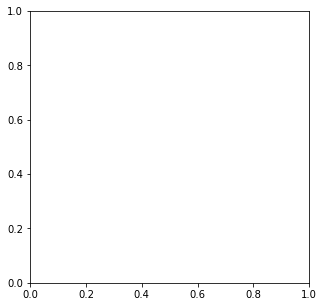

In [67]:
# RESTRICTED VS AD LIB
f, ax =plt.subplots(figsize=[5,5])

pre = 5
post = 10
mineventlength=10
binlength=0.1

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

#restricted
x1_restricted = np.arange(0,bins_early)
x2_restricted = np.arange(restricted_full.shape[1] - bins_late, restricted_full.shape[1])

mean_restricted = np.mean(restricted_full, axis=0)
error_values_restricted = np.std(restricted_full, axis=0) / np.sqrt(len(restricted_full))

ax.plot(x1_restricted, mean_restricted[:bins_early], color=colors_restricted)
ax.plot(x2_restricted, mean_restricted[-bins_late:], color=colors_restricted)

ax.fill_between(x1_restricted, mean_restricted[:bins_early]-error_values_restricted[:bins_early], 
                mean_restricted[:bins_early]+error_values_restricted[:bins_early], 
                color=colors_restricted, alpha=0.3)
ax.fill_between(x2_restricted, mean_restricted[-bins_late:]-error_values_restricted[-bins_late:], 
                mean_restricted[-bins_late:]+error_values_restricted[-bins_late:], 
                color=colors_restricted, alpha=0.3)

# adlib dark

x1_dark = np.arange(0,bins_early)
x2_dark = np.arange(dark_full.shape[1] - bins_late, dark_full.shape[1])

mean_dark = np.mean(dark_full, axis=0)
error_values_dark = np.std(dark_full, axis=0) / np.sqrt(len(dark_full))

ax.plot(x1_dark, mean_dark[:bins_early], color=colors_adlib_dark)
ax.plot(x2_dark, mean_dark[-bins_late:], color=colors_adlib_dark)

ax.fill_between(x1_dark, mean_dark[:bins_early]-error_values_dark[:bins_early], 
                mean_dark[:bins_early]+error_values_dark[:bins_early], 
                color=colors_adlib_dark, alpha=0.3)
ax.fill_between(x2_dark, mean_dark[-bins_late:]-error_values_dark[-bins_late:], 
                mean_dark[-bins_late:]+error_values_dark[-bins_late:], 
                color=colors_adlib_dark, alpha=0.3)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


IndexError: tuple index out of range

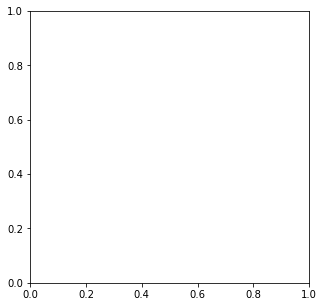

In [68]:
# CALORIC VS NONCALORIC
f, ax =plt.subplots(figsize=[5,5])

pre = 5
post = 10
mineventlength=10
binlength=0.1

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

# sucralose

x1_sucralose = np.arange(0,bins_early)
x2_sucralose = np.arange(sucralose_full.shape[1] - bins_late, sucralose_full.shape[1])

mean_sucralose = np.nanmean(sucralose_full, axis=0)
error_values_sucralose= np.std(sucralose_full, axis=0) / np.sqrt(len(sucralose_full))

ax.plot(x1_sucralose, mean_sucralose[:bins_early], color=colors_sucralose)
ax.plot(x2_sucralose, mean_sucralose[-bins_late:], color=colors_sucralose)

ax.fill_between(x1_sucralose, mean_sucralose[:bins_early]-error_values_sucralose[:bins_early], 
                mean_sucralose[:bins_early]+error_values_sucralose[:bins_early], 
                color=colors_sucralose, alpha=0.3)
ax.fill_between(x2_sucralose, mean_sucralose[-bins_late:]-error_values_sucralose[-bins_late:], 
                mean_sucralose[-bins_late:]+error_values_sucralose[-bins_late:], 
                color=colors_sucralose, alpha=0.3)

# adlib dark

x1_dark = np.arange(0,bins_early)
x2_dark = np.arange(dark_full.shape[1] - bins_late, dark_full.shape[1])

mean_dark = np.mean(dark_full, axis=0)
error_values_dark = np.std(dark_full, axis=0) / np.sqrt(len(dark_full))

ax.plot(x1_dark, mean_dark[:bins_early], color=colors_adlib_dark)
ax.plot(x2_dark, mean_dark[-bins_late:], color=colors_adlib_dark)

ax.fill_between(x1_dark, mean_dark[:bins_early]-error_values_dark[:bins_early], 
                mean_dark[:bins_early]+error_values_dark[:bins_early], 
                color=colors_adlib_dark, alpha=0.3)
ax.fill_between(x2_dark, mean_dark[-bins_late:]-error_values_dark[-bins_late:], 
                mean_dark[-bins_late:]+error_values_dark[-bins_late:], 
                color=colors_adlib_dark, alpha=0.3)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


In [52]:
sucralose_full[7,:]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [49]:
error_values_sucralose

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [46]:
AUC_restricted_last5 = np.trapz(np.array(restricted_snips_mean_end)[:,0:50])
AUC_restricted_first5= np.trapz(np.array(restricted_snips_mean_end)[:,50:100])
AUC_restricted_next5= np.trapz(np.array(restricted_snips_mean_end)[:,100:150])
AUC_restricted_diff1 = AUC_restricted_last5 - AUC_restricted_first5

NameError: name 'restricted_snips_mean_end' is not defined

In [47]:
AUC_restricted_last5

NameError: name 'AUC_restricted_last5' is not defined

In [48]:
AUC_restricted_diff1

NameError: name 'AUC_restricted_diff1' is not defined

In [29]:
def AUC_differences_run_end(data):
    AUC_last5s_licking = np.trapz(np.array(data)[:,0:50])
    AUC_first5s_after_licking = np.trapz(np.array(data)[:,50:100])
    AUC_next5s_after_licking= np.trapz(np.array(data)[:,100:150])
    AUC_diff1 = AUC_last5s_licking - AUC_first5s_after_licking
    AUC_diff2 = AUC_last5s_licking - AUC_next5s_after_licking
    
    return AUC_diff1, AUC_diff2

In [ ]:
AUC_light_1, AUC_light_2 = AUC_differences_run_end(light_snips_mean_end)
AUC_dark_1, AUC_dark_2 = AUC_differences_run_end(dark_snips_mean_end)
AUC_restricted_1, AUC_restricted_2 = AUC_differences_run_end(restricted_snips_mean_end)
AUC_sucralose_1, AUC_sucralose_2 = AUC_differences_run_end(sucralose_snips_mean_end)

In [32]:
AUC_restricted_1

array([-5.56312444, -3.7622739 , -1.35709332,  6.70030251, -1.05717506,
       -3.63026422, -2.72807639, -4.01957807, -5.40201071, -2.94018383,
       -0.15640614])

In [33]:
AUC_restricted_2

array([  2.75148   , -21.70708473,  -5.13795592,  -5.35725376,
       -19.56522121,  -9.50091364, -11.40344763, -18.99402274,
       -37.10158356,  -8.2443581 ,  -3.7147843 ])

(<AxesSubplot:>,
 [1, 2, 3, 4],
 [<BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>],
 [[<matplotlib.lines.Line2D at 0x1c8bfa2d0a0>],
  [<matplotlib.lines.Line2D at 0x1c8bfa47e80>]])

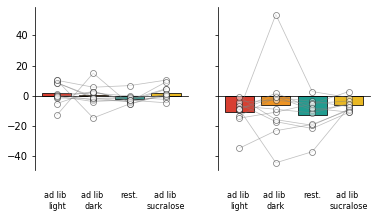

In [30]:


f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[6,3],
                            sharey= True,
                            gridspec_kw={"wspace":0.2})

tp.barscatter([AUC_light_1,
               AUC_dark_1,
               AUC_restricted_1,
               AUC_sucralose_1],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax1)

tp.barscatter([AUC_light_2,
               AUC_dark_2,
               AUC_restricted_2,
               AUC_sucralose_2],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax2)


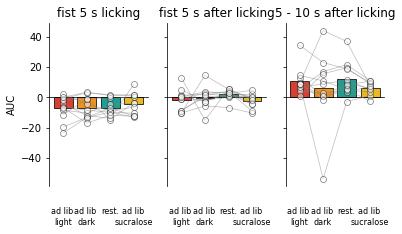

In [177]:
f, [ax1, ax2, ax3] =plt.subplots(ncols=3,
                            figsize=[6,3],
                            sharey= True,
                            gridspec_kw={"wspace":0.2})

tp.barscatter([np.trapz(np.array(light_snips_mean_start)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_start)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_start)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_start)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax1)

tp.barscatter([np.trapz(np.array(light_snips_mean_end)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_end)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_end)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_end)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax2)

tp.barscatter([np.trapz(np.array(light_snips_mean_end)[:,100:]),
               np.trapz(np.array(dark_snips_mean_end)[:,100:]),
               np.trapz(np.array(restricted_snips_mean_end)[:,100:]),
               np.trapz(np.array(sucralose_snips_mean_end)[:,100:])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax3)

ax1.set_ylabel("AUC")
ax1.set_title("fist 5 s licking")
ax2.set_title("fist 5 s after licking")
ax3.set_title("5 - 10 s after licking")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\new_diff_conditions_AUC.pdf")

(<AxesSubplot:>,
 [1, 2, 3, 4],
 [<BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>],
  <matplotlib.collections.PathCollection at 0x225f38829a0>])

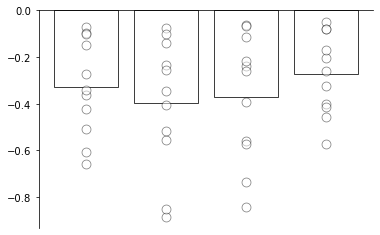

In [169]:
restricted_min_start= []
light_min_start= []
dark_min_start= []
sucralose_min_start= []

for snip in restricted_snips_mean_start:
    restricted_min_start.append(np.min(snip)) 
    
for snip in light_snips_mean_start:
    light_min_start.append(np.min(snip)) 
    
for snip in dark_snips_mean_start:
    dark_min_start.append(np.min(snip)) 
    
for snip in sucralose_snips_mean_start:
    sucralose_min_start.append(np.min(snip)) 
    
tp.barscatter([restricted_min_start, light_min_start, dark_min_start, sucralose_min_start] )  

In [167]:
restricted_min

[-0.5084407371203659,
 -0.36219030673165714,
 -0.0730815495768999,
 -0.4242191282693648,
 -0.6587158331982538,
 -0.09875609844155125,
 -0.33948346622287345,
 -0.2709053563934905,
 -0.6082468217804128,
 -0.10322066971342178,
 -0.1479603627248506]

Text(0, 0.5, 'AUC')

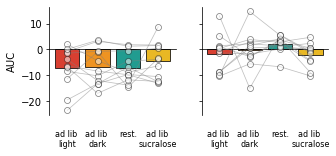

In [152]:
f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[5,2],
                            sharey= True,
                            gridspec_kw={"wspace":0.2})

tp.barscatter([np.trapz(np.array(light_snips_mean_start)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_start)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_start)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_start)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax1)

tp.barscatter([np.trapz(np.array(light_snips_mean_end)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_end)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_end)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_end)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax2)

ax1.set_ylabel("AUC")
#ax2.set_ylabel("AUC")